In [1]:
import pandas as pd

pd.set_option('display.max_rows', 30)

In [2]:
# Load the most recent data file with the instituion names
data_file_inst = 'dataset/CollegeScorecard_Raw_Data_03142022/Most-Recent-Cohorts-Institution.csv'
df_inst = pd.read_csv(data_file_inst, low_memory=False)

In [3]:
df_inst.shape

(6694, 2989)

In [4]:
df_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Columns: 2989 entries, UNITID to MD_EARN_WNE_MALE1_P10
dtypes: float64(800), int64(16), object(2173)
memory usage: 152.7+ MB


In [ ]:
list_of_earning_features=['DEBT_MDN','GRAD_DEBT_MDN','WDRAW_DEBT_MDN','SCHTYPE','MD_EARN_WNE_P10','MDEARN_PD']

> DEBT_MDN - The median original amount of the loan principal upon entering repayment
> GRAD_DEBT_MDN - The median debt for students who have completed
> WDRAW_DEBT_MDN - The median debt for students who have not completed

> SCHTYPE - Control of institution, per PEPS(1 - Public, 2- Pvt, Non Profit, 3 - Proprietary)

> MD_EARN_WNE_P10 - Median earnings of students working and not enrolled 10 years after entry
> MDEARN_PD - Median earnings of students working and not enrolled 10 years after entry


In [5]:
list_of_cost_features=['INSTNM','CITY','STABBR','COSTT4_A','ADM_RATE','AVGFACSAL','SAT_AVG','ACTCMMID','DEBT_MDN','GRAD_DEBT_MDN','WDRAW_DEBT_MDN','MD_EARN_WNE_P10','PREDDEG','ICLEVEL','SCHTYPE']

In [6]:
df_features_cost_features = df_inst[list_of_cost_features]
df_features_cost_features.shape

(6694, 15)

In [8]:
print(df_features_cost_features.dtypes.value_counts())
df_features_cost_features.columns[(df_features_cost_features.dtypes == object)]

float64    7
object     6
int64      2
dtype: int64


Index(['INSTNM', 'CITY', 'STABBR', 'DEBT_MDN', 'GRAD_DEBT_MDN',
       'WDRAW_DEBT_MDN'],
      dtype='object')

In [9]:
df_features_cost_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INSTNM           6694 non-null   object 
 1   CITY             6694 non-null   object 
 2   STABBR           6694 non-null   object 
 3   COSTT4_A         3361 non-null   float64
 4   ADM_RATE         1988 non-null   float64
 5   AVGFACSAL        3941 non-null   float64
 6   SAT_AVG          1278 non-null   float64
 7   ACTCMMID         1252 non-null   float64
 8   DEBT_MDN         6560 non-null   object 
 9   GRAD_DEBT_MDN    6560 non-null   object 
 10  WDRAW_DEBT_MDN   6560 non-null   object 
 11  MD_EARN_WNE_P10  5184 non-null   float64
 12  PREDDEG          6694 non-null   int64  
 13  ICLEVEL          6694 non-null   int64  
 14  SCHTYPE          6327 non-null   float64
dtypes: float64(7), int64(2), object(6)
memory usage: 784.6+ KB


In [12]:
df_features_cost_features["DEBT_MDN"] = pd.to_numeric(df_features_cost_features.DEBT_MDN, errors='coerce')
df_features_cost_features["GRAD_DEBT_MDN"] = pd.to_numeric(df_features_cost_features.GRAD_DEBT_MDN, errors = 'coerce')
df_features_cost_features["WDRAW_DEBT_MDN"] = pd.to_numeric(df_features_cost_features.WDRAW_DEBT_MDN, errors = 'coerce')

C:\Users\saman\AppData\Local\Temp/ipykernel_49992/2755494333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_cost_features["DEBT_MDN"] = pd.to_numeric(df_features_cost_features.DEBT_MDN, errors='coerce')
C:\Users\saman\AppData\Local\Temp/ipykernel_49992/2755494333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_cost_features["GRAD_DEBT_MDN"] = pd.to_numeric(df_features_cost_features.GRAD_DEBT_MDN, errors = 'coerce')
C:\Users\saman\AppData\Local\Temp/ipykernel_49992/2755494333

In [13]:
df_features_cost_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INSTNM           6694 non-null   object 
 1   CITY             6694 non-null   object 
 2   STABBR           6694 non-null   object 
 3   COSTT4_A         3361 non-null   float64
 4   ADM_RATE         1988 non-null   float64
 5   AVGFACSAL        3941 non-null   float64
 6   SAT_AVG          1278 non-null   float64
 7   ACTCMMID         1252 non-null   float64
 8   DEBT_MDN         5608 non-null   float64
 9   GRAD_DEBT_MDN    5206 non-null   float64
 10  WDRAW_DEBT_MDN   4998 non-null   float64
 11  MD_EARN_WNE_P10  5184 non-null   float64
 12  PREDDEG          6694 non-null   int64  
 13  ICLEVEL          6694 non-null   int64  
 14  SCHTYPE          6327 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 784.6+ KB


In [14]:
print(df_features_cost_features.dtypes.value_counts())
df_features_cost_features.columns[(df_features_cost_features.dtypes == object)]

float64    10
object      3
int64       2
dtype: int64


Index(['INSTNM', 'CITY', 'STABBR'], dtype='object')

In [15]:
df_features_cost_features['DEBT_MDN'].value_counts()

9500.0     509
5500.0     277
6333.0     177
12000.0    149
19500.0    131
          ... 
12860.0      1
14476.0      1
18837.0      1
13883.0      1
4953.0       1
Name: DEBT_MDN, Length: 1763, dtype: int64

In [16]:
df_features_cost_features.head()

,INSTNM,CITY,STABBR,COSTT4_A,ADM_RATE,AVGFACSAL,SAT_AVG,ACTCMMID,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,MD_EARN_WNE_P10,PREDDEG,ICLEVEL,SCHTYPE
0,Alabama A & M University,Normal,AL,23053.0,0.9175,7709.0,939.0,17.0,15250.0,31000.0,10221.0,36339.0,3,1,1.0
1,University of Alabama at Birmingham,Birmingham,AL,24495.0,0.7366,11049.0,1234.0,26.0,15085.0,22250.0,9500.0,46990.0,3,1,1.0
2,Amridge University,Montgomery,AL,14800.0,NaN,4187.0,NaN,NaN,10984.0,31417.0,9500.0,37895.0,2,1,2.0
3,University of Alabama in Huntsville,Huntsville,AL,23917.0,0.8257,9688.0,1319.0,28.0,14000.0,21450.0,9500.0,54361.0,3,1,1.0
4,Alabama State University,Montgomery,AL,21866.0,0.9690,7221.0,946.0,17.0,17500.0,31000.0,10489.0,32084.0,3,1,1.0


In [115]:
# Filtering out the 
# Predominant undergraduate degree awarded(PREDDEG=3)
# Level of institution (ICLEVEL) = 1 (4 Year)
df_inst_4_year_coll = df_features_cost_features.query('PREDDEG == 3 and ICLEVEL == 1', engine='python')
df_inst_4_year_coll.shape

(2041, 14)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top Ten Costliest Schools')

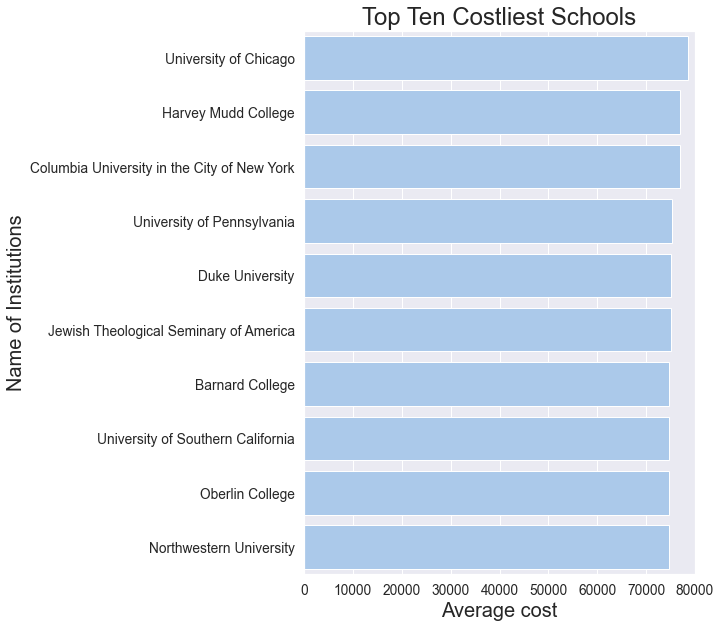

In [50]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.25)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 10))

# Load the Top 10 Colleges by cost
df_top10_by_cost = df_inst_4_year_coll.nlargest(n=10 , columns=['COSTT4_A'])

# Plot the total cost
sns.set_color_codes("pastel")
sns.barplot(y="INSTNM",x="COSTT4_A",
           data = df_top10_by_cost,
           label="Average Cost", color="b")

# Plot the Tuition Fess
# sns.set_color_codes("muted")
# sns.barplot(x="TUITIONFEE_IN", y="INSTNM", data=df_features_inst_top25_state_cnt_hist,
#            label="Tuition Fees", color="b")
# sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
# ax.legend(ncol=2, loc="upper right", frameon=True)

ax.set(xlim=(0, 80000))
ax.set_xlabel("Average cost", fontsize=20)
ax.set_ylabel("Name of Institutions", fontsize=20)
ax.set_title("Top Ten Costliest Schools", fontsize=24)


Text(0.5, 1.0, 'Top Ten Cheapest Schools')

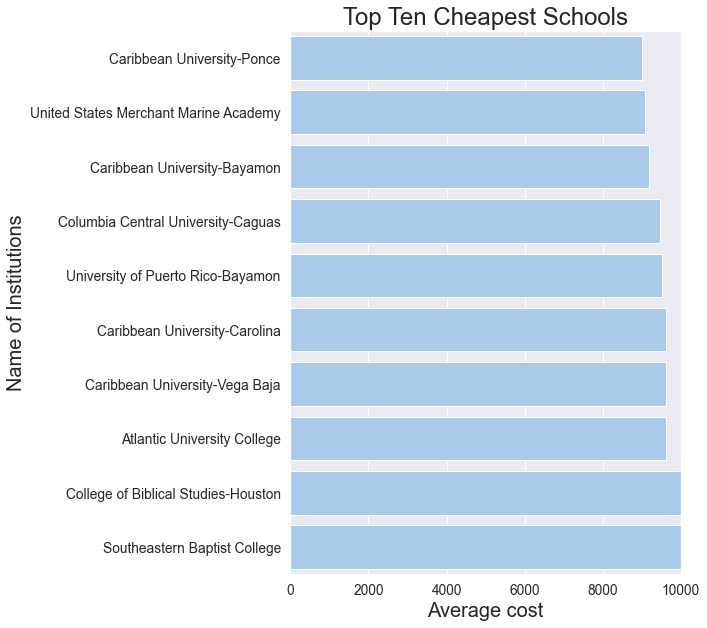

In [51]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.25)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 10))

# Load the Top 10 Colleges by cost
df_top10_by_cost = df_inst_4_year_coll.nsmallest(n=10 , columns=['COSTT4_A'])

# Plot the total cost
sns.set_color_codes("pastel")
sns.barplot(y="INSTNM",x="COSTT4_A",
           data = df_top10_by_cost,
           label="Average Cost", color="b")

ax.set(xlim=(0, 10000))
ax.set_xlabel("Average cost", fontsize=20)
ax.set_ylabel("Name of Institutions", fontsize=20)
ax.set_title("Top Ten Cheapest Schools", fontsize=24)

### We next examine the relationship between cost and admission rate, faculty salary, and SAT score.

In [53]:
df_inst_4_year_coll[['INSTNM','COSTT4_A','ADM_RATE','AVGFACSAL','SAT_AVG']]

,INSTNM,COSTT4_A,ADM_RATE,AVGFACSAL,SAT_AVG
0,Alabama A & M University,23053.0,0.9175,7709.0,939.0
1,University of Alabama at Birmingham,24495.0,0.7366,11049.0,1234.0
3,University of Alabama in Huntsville,23917.0,0.8257,9688.0,1319.0
4,Alabama State University,21866.0,0.9690,7221.0,946.0
5,The University of Alabama,29872.0,0.8268,10291.0,1261.0
...,...,...,...,...,...
6157,Arizona College of Nursing-Tempe,35130.0,0.5217,6925.0,NaN
6171,Christ Mission College,NaN,NaN,NaN,NaN
6174,Urshan College,NaN,0.8365,5352.0,NaN
6179,Yeshiva Yesoda Hatorah Vetz Chaim,NaN,NaN,3543.0,NaN


[]

<Figure size 1440x7200 with 0 Axes>

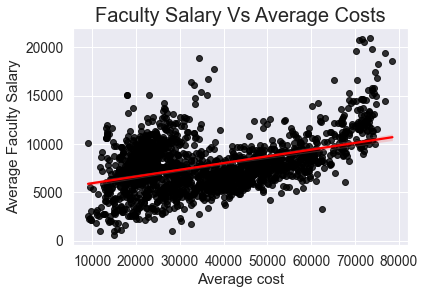

In [101]:
# Create a visualization
# Initialize the matplotlib figure

plt.figure(figsize=(20,100))
# Load the dataset to show the 
df_FacultySal_vs_AvgCost = df_inst_4_year_coll[['COSTT4_A','AVGFACSAL']]

fig, ax = plt.subplots()

sns.set_color_codes("pastel")
sns.regplot(
    data=df_FacultySal_vs_AvgCost,
    x="COSTT4_A", y="AVGFACSAL",
    scatter_kws={"color": "black"},
    line_kws={"color": "red"}
)

ax.set_xlabel("Average cost", fontsize=15)
ax.set_ylabel("Average Faculty Salary", fontsize=15)
ax.set_title("Faculty Salary Vs Average Costs", fontsize=20)
ax.plot()

The first thing that stands out in this plot is the low average salaries that college professors earn. It is possible that many of them are part time? Also, it appears that there are two unique groups in this data. There appears to be a positive linear relationship between AverageCost and FacutlySalary for Institutions with an AverageCost > 20000, and another weaker positive linear relationship between these two features for Average Cost < 20000. In general, we can say that more expensive schools pay their Faculty a higher wage.

[]

<Figure size 1440x7200 with 0 Axes>

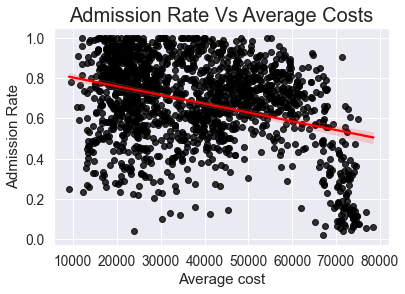

In [102]:
# Create a visualization
# Initialize the matplotlib figure

plt.figure(figsize=(20,100))
# Load the dataset to show the 
df_FacultySal_vs_AvgCost = df_inst_4_year_coll[['COSTT4_A','ADM_RATE']]

fig, ax = plt.subplots()

sns.set_color_codes("pastel")
sns.regplot(
    data=df_FacultySal_vs_AvgCost,
    x="COSTT4_A", y="ADM_RATE",
    scatter_kws={"color": "black"},
    line_kws={"color": "red"}
)

ax.set_xlabel("Average cost", fontsize=15)
ax.set_ylabel("Admission Rate", fontsize=15)
ax.set_title("Admission Rate Vs Average Costs", fontsize=20)
ax.plot()

In contrast to FacultySalary, we see a relatively weak negative linear relationship between AdmissionRate and AverageCost that seems to be driven by the cluster of institutions with a less than 20% admission rate and cost of greater than 60,000. Assessment of the strength of this relationship could be done by evaluating the p-value of the slope of the regression line, but this is beyond the scope of this EDA.

## Debt Accrued From Attending College
Another major financial aspect of attending a post secondary school is the debt that often comes with it. Taking on debt can be a wise financial move it the returns are greater, and we will get to this analysis below, but first we explore the debt in this data set. There are two debt features to consider:

> GRAD_DEBT_MDN – median debt of students that completed

> WDRAW_DEBT_MDN – median debt of students that did not complete

First we find the top ten schools where students that finish their schooling have the most debt.

In [117]:
df_inst_4_year_with_debt= df_inst_4_year_coll.query('GRAD_DEBT_MDN_a > 0.00', engine='python')
df_inst_4_year_with_debt

,INSTNM,CITY,STABBR,COSTT4_A,ADM_RATE,AVGFACSAL,SAT_AVG,ACTCMMID,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,MD_EARN_WNE_P10,PREDDEG,ICLEVEL,GRAD_DEBT_MDN_a
0,Alabama A & M University,Normal,AL,23053.0,0.9175,7709.0,939.0,17.0,31000,10221,36339.0,3,1,31000.0
1,University of Alabama at Birmingham,Birmingham,AL,24495.0,0.7366,11049.0,1234.0,26.0,22250,9500,46990.0,3,1,22250.0
3,University of Alabama in Huntsville,Huntsville,AL,23917.0,0.8257,9688.0,1319.0,28.0,21450,9500,54361.0,3,1,21450.0
4,Alabama State University,Montgomery,AL,21866.0,0.9690,7221.0,946.0,17.0,31000,10489,32084.0,3,1,31000.0
5,The University of Alabama,Tuscaloosa,AL,29872.0,0.8268,10291.0,1261.0,27.0,23072,9500,52751.0,3,1,23072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,Chamberlain University-Louisiana,Jefferson,LA,NaN,1.0000,6743.0,NaN,NaN,22204,11749,77512.0,3,1,22204.0
6103,Drury University-College of Continuing Profess...,Springfield,MO,18496.0,NaN,6771.0,NaN,NaN,20500,7500,37543.0,3,1,20500.0
6106,Indiana Institute of Technology-College of Pro...,Fort Wayne,IN,22379.0,NaN,NaN,NaN,NaN,27000,10500,46035.0,3,1,27000.0
6156,Arizona College-Dallas,Dallas,TX,NaN,0.4138,7453.0,NaN,NaN,9500,6334,NaN,3,1,9500.0


Text(0.5, 1.0, 'Top Ten Schools For Most Debt')

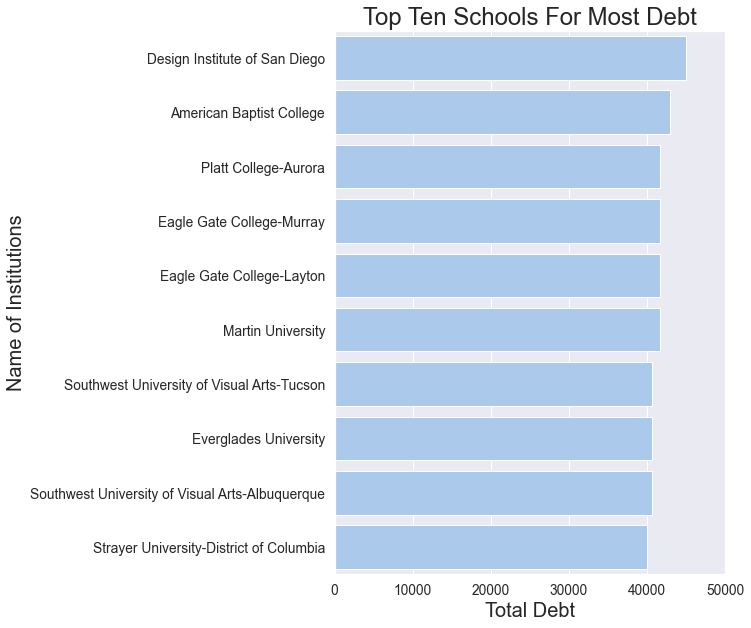

In [121]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.25)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7,10))

# Load the Top 10 Colleges by cost
df_top10_by_debt = df_inst_4_year_coll.nlargest(n=10 , columns=['GRAD_DEBT_MDN_a'])

# Plot the total cost
sns.set_color_codes("pastel")
sns.barplot(y="INSTNM",x="GRAD_DEBT_MDN_a",
           data = df_top10_by_debt,
           label="Total Debt", color="b")

ax.set(xlim=(0, 50000))
ax.set_xlabel("Total Debt", fontsize=20)
ax.set_ylabel("Name of Institutions", fontsize=20)
ax.set_title("Top Ten Schools For Most Debt", fontsize=24)

Interestingly, we find that many of the schools associated with high debt are visual arts and design institutions.

In [127]:
df_features_cost_features[['GRAD_DEBT_MDN_a']>0]

TypeError: '>' not supported between instances of 'list' and 'int'